In [1]:
import scipy.io as io
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from ExtendedTSSRP import ExtendedTSSRP

data = io.loadmat('data/temperature.mat')
X_org = data['mMov0']
X = data['mMov1']
X = np.rollaxis(X,2,0)
X_org = np.rollaxis(X_org,2,0)
X.shape
nt,nx,ny = X.shape


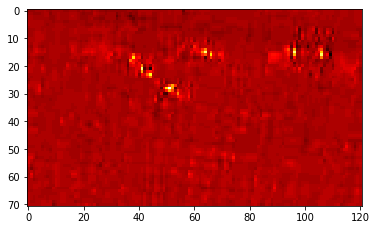

In [3]:
fig = plt.figure()
isample = 0
ims = []
for t in range(nt):
    im = plt.imshow(X[t],cmap=plt.get_cmap('hot'))
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50,blit=True,repeat_delay=1000)
ani.save('3D_original.mp4')

In [4]:
from IPython.display import Video
Video("3D_original.mp4")

# Find the printing regions from the dataset 

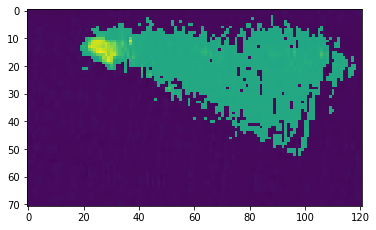

In [38]:
printingregion = np.sum(X_org,0)>30
defectregion = X[-100]
plt.imshow(printingregion+defectregion)

# Find the failure mode $M$ for that overlaps with the printing regions

In [68]:
from Bspline import bsplineBasis
kx = 8
ky = 10
degree = 1 # Overlap region? (Size of B-spline basis) 
Bx = bsplineBasis(nx,kx-degree+1,degree)
By = bsplineBasis(ny,ky-degree+1,degree)
Mall = np.kron(Bx,By)



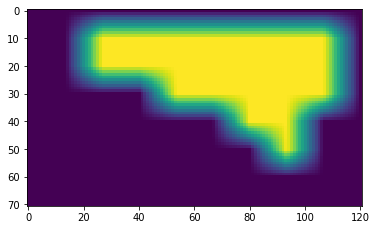

In [69]:
ii = []
MMregion = 0
for i in np.arange(Mall.shape[1]):
    mM = Mall[:,i].reshape(nx,ny)
    mMregion = mM > 0.5
    res = np.logical_and(mMregion,printingregion)
    if np.sum(res[:]) > 20:
        ii.append(i) 
        MMregion = MMregion + mM
M = Mall[:,ii]
plt.imshow(MMregion)